In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier as RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,accuracy_score
import pylab
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import median_absolute_error
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
import subprocess
from scipy.sparse import csr_matrix, hstack
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import boxcox

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:28: UserWarning: [Errno 2] No such file or directory.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
x_test = pd.read_csv('x_test.csv',sep=';',header=None)
x_train = pd.read_csv('x_train.csv',sep=';',header=None)
y_train = pd.read_csv('y_train.csv',sep=';',header=None)
df_X = pd.concat((x_train, x_test))

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([  113.,     0.,  1164.,     0.,     0.,  1521.,     0.,   581.,
            0.,   110.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

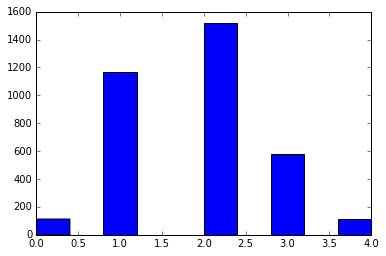

In [3]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
plt.hist(y_train.values)

## Преобразуем в категориальные, если надо и объединяем
This block is designed to produce a sparce matrix with encoded category features
But for the sake of computation resourse - we will not do it

In [4]:
#categ = [182,138,115,131,97,76,11,156,200,96]
categ = [None]

In [5]:
for i in categ:
    df_X.rename(columns={i:'cat'+str(i)}, inplace=True)
for i in xrange(df_X.shape[1]):
    df_X.rename(columns={i:'cont'+str(i)}, inplace=True)
sparse_data = []
f_cat = [f for f in df_X.columns if 'cat' in f]
for f in f_cat:
    dummy = pd.get_dummies(df_X[f].astype('category'))
    tmp = csr_matrix(dummy)
    sparse_data.append(tmp)

In [6]:
f_num = [f for f in df_X.columns if 'cont' in f]
scaler = StandardScaler()
tmp = csr_matrix(df_X[f_num])
sparse_data.append(tmp)

In [7]:
ntrain = x_train.shape[0]
xtr_te = tmp.todense()
xtrain = xtr_te[:ntrain, :]
xtest = xtr_te[ntrain:, :]
print('Dim train', xtrain.shape)
print('Dim test', xtest.shape)
reserved = xtr_te

('Dim train', (3489, 223))
('Dim test', (2327, 223))


### Есть ли категории
Check for number of unique values

In [8]:
cat = []
cat_test = pd.DataFrame(reserved)
for i in xrange(cat_test.shape[1]):
    cat.append(((len(cat_test[i].unique())),i))
print 'Minimum number of distinct values in a column is', (min(cat))
if min(cat[0])>100:
    print "Looks like there is no categorical features"
else:
    print "Looks like there is  categorical features"
cat.sort()

Minimum number of distinct values in a column is (89, 182)
Looks like there is  categorical features


In [9]:
category = []
for i in xrange(12):
    category.append(cat[i][1])
print category

[182, 115, 97, 138, 131, 76, 11, 156, 200, 96, 79, 10]


### Обратим в дальнейшем внимание на фичи 182,115,97,138,131,76,11,156,200,96,79,10
Focus on features  182,115,97,138,131,76,11,156,200,96,79,10

### Отбор фич (тяжелая часть, в оригинале xrange(100))  - для ускорения варьируем это число (чуть ниже даны уже подсчитанные данные)
Check it with feature selection
We can skip this block - the best features have been listed after it

In [10]:
y = pd.read_csv('y_train.csv',sep=';',header=None)
res = []
c = 0
for i in xrange(223):
    xtr_te = reserved[:,i]
    xtrain = xtr_te[:ntrain, :]
    xtest = xtr_te[ntrain:, :]
    v = 0
    
    for j in xrange(1):
        X_train,X_test,y_train,y_test = train_test_split(xtrain,y,test_size=0.3,stratify = y)

        rfc = RandomForestClassifier(n_estimators=150,random_state=1342)
        rfc.fit(X=X_train,y=y_train)
        pred = rfc.predict(X_test )
        v+= accuracy_score(y_test,pred)/1.0
    res.append((v,i))
    #print(v,i)
    c+=1
    if c % 50 ==0:
        print c

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


50
100
150
200


In [13]:
res.sort(reverse=True)
best = []
for i in xrange(12):
    best.append(res[i][1])

In [14]:
best.sort()
category.sort()

print best
print category
#best = [138, 79, 182, 156, 11, 76, 200, 10, 96, 97, 115, 131] # already calculated
#category = [182, 115, 97, 138, 131, 76, 11, 156, 200, 96, 79, 10] 

[10, 11, 76, 79, 96, 97, 115, 131, 138, 156, 182, 200]
[10, 11, 76, 79, 96, 97, 115, 131, 138, 156, 182, 200]


### Best result 0,6636 - первый блок с подбором можно опустить
The first one here also can be skipped
We are looking for the best number of estimators

In [ ]:
result =[]
for b in xrange(1):
    #best = [138, 79, 182, 156, 11, 76, 200, 10, 96, 97, 115, 131, 135]     #gives slighty better result

    for i in [250,300,350,400,450,500]:
   
        v = 0    
        for j in xrange(10):
            xtr_te = reserved[:,best]
            

 
            xtrain = xtr_te[:ntrain, :]
            xtest = xtr_te[ntrain:, :]
            X_train,X_test,y_train,y_test = train_test_split(xtrain,y,test_size=0.3,stratify=y)
            
            rfc = RandomForestClassifier(n_estimators=i,max_features=1,
                                                             class_weight={0:27.7,1:3.1,2:2.24,3:6,4:32})
            rfc.fit(X=X_train,y=y_train)
            pred = rfc.predict(X_test )
            
            v+= accuracy_score(y_test,pred)/10.0
        print (v,i)
        result.append((v,i))

In [40]:
#best = [138, 79, 182, 156, 11, 76, 200, 10, 96, 97, 115, 131, 135]     #gives slighty better result

xtr_te = reserved[:,best]
xtrain = xtr_te[:ntrain, :]
xtest = xtr_te[ntrain:, :]
y = pd.read_csv('y_train.csv',sep=';',header=None)

rfc = RandomForestClassifier(n_estimators=300,max_features=1,class_weight={0:27.7,1:3.1,2:2.24,3:6,4:32})
rfc.fit(X=xtrain,y=y)
pred = rfc.predict(xtest)
df = pd.DataFrame(pred)
df.to_csv('Random_Forest_66_best_2.csv',index=None,header = None)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


### Best result 0,6713781
Sometimes it works

In [ ]:
#best = [138, 79, 182, 156, 11, 76, 200, 10, 96, 97, 115, 131]

y = pd.read_csv('y_train.csv',sep=';',header=None)

xtr_te = reserved[:,best]
xtrain = xtr_te[:ntrain, :]
xtest = xtr_te[ntrain:, :]
y_pred =pd.read_csv('Random_Forest_66.csv',header = None)
rzdel = 1400
y_total = pd.concat((y,y_pred.ix[0:rzdel-1,:]),axis = 0)
x_total = np.concatenate((xtrain,xtest[0:rzdel,:]),axis = 0)
print y_total.shape
print x_total.shape
rfc = RandomForestClassifier(n_estimators=850,max_features=1,class_weight={0:27.7,1:2*3.1,2:2*2.24,3:2*6,4:32})
rfc.fit(X=x_total,y=y_total)
pred = rfc.predict(xtest[rzdel:,:])
print pred.shape
df = pd.DataFrame(pred)
df.to_csv('RF_all_data_1000-2327.csv',index=None,header = None)
y_total = pd.concat((y,y_pred.ix[rzdel:,:]),axis = 0)
x_total = np.concatenate((xtrain,xtest[rzdel:,:]),axis = 0)
print y_total.shape
print x_total.shape
rfc = RandomForestClassifier(n_estimators=850,max_features=1,class_weight={0:27.7,1:2*3.1,2:2*2.24,3:2*6,4:32})
rfc.fit(X=x_total,y=y_total)
pred = rfc.predict(xtest[:rzdel,:])
print pred.shape
df = pd.DataFrame(pred)
df.to_csv('RF_all_data_0-1000.csv',index=None,header = None)
y1 = pd.read_csv('RF_all_data_0-1000.csv',header=None)
y2 = pd.read_csv('RF_all_data_1000-2327.csv',header=None)
pred = pd.concat((y1,y2),axis = 0)
pred.to_csv("RF_OF_TOTAL" +str(rzdel)+'IMPROVED'+".csv",header=None,index = None)
print (sum(pred.values - y_pred.values !=0))


### Lets take another look for mean of every feature

In [41]:
mn = np.zeros((223,1))
for i in xrange(223):
    mn[i] = np.mean(reserved[:,i])

(array([  12.,  188.,    0.,    2.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,   10.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    2.,    2.,    1.,    3.,    0.,    2.]),
 array([ -2.63161422e-03,   2.56344994e-01,   5.15321603e-01,
          7.74298211e-01,   1.03327482e+00,   1.29225143e+00,
          1.55122804e+00,   1.81020465e+00,   2.06918125e+00,
          2.32815786e+00

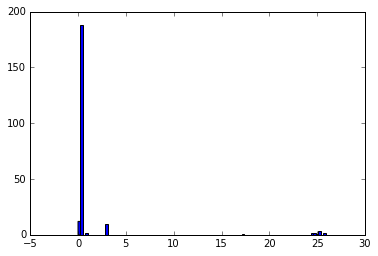

In [42]:
plt.hist(mn,bins=100)

In [43]:
for i in np.arange(0,100,1):
    
    print np.percentile(mn,i),i

-0.00263161422455 0
-0.00088414445368 1
-0.000202657951995 2
0.00035606755815 3
0.00135855125935 4
0.160113347297 5
0.486809021071 6
0.488616998401 7
0.489473628543 8
0.490796335682 9
0.491427564085 10
0.49258888362 11
0.493712918698 12
0.494136377001 13
0.494692371566 14
0.495115185463 15
0.495333628738 16
0.495515659544 17
0.49571827526 18
0.495837409195 19
0.495915950526 20
0.496200734717 21
0.496498450084 22
0.496625314265 23
0.4967919311 24
0.497013254662 25
0.497177998793 26
0.49736595286 27
0.497532437837 28
0.497663746907 29
0.49780921455 30
0.497993689132 31
0.498081459585 32
0.498197640855 33
0.498285121558 34
0.498413930712 35
0.49843778852 36
0.498504026776 37
0.498626833073 38
0.498653222841 39
0.498678270715 40
0.498809329014 41
0.498933911121 42
0.499018594783 43
0.499191009911 44
0.499343209779 45
0.499451028459 46
0.499559276219 47
0.499739203802 48
0.500132231499 49
0.500215543313 50
0.500324405669 51
0.500470960021 52
0.500713772517 53
0.500768150444 54
0.50080271297

### WE have anomalies 

In [44]:
less = []
more = []
for i in xrange(223):
    if mn[i]>0.6:
        print 'more than 0.6',i
        more.append(i)
    if mn[i]<0.4:
        print 'less than 0.4',i
        less.append(i)
        

more than 0.6 9
less than 0.4 10
less than 0.4 11
more than 0.6 14
more than 0.6 24
more than 0.6 25
more than 0.6 38
more than 0.6 39
more than 0.6 44
more than 0.6 48
more than 0.6 50
more than 0.6 53
more than 0.6 56
more than 0.6 65
less than 0.4 76
less than 0.4 79
more than 0.6 80
less than 0.4 96
less than 0.4 97
more than 0.6 100
less than 0.4 115
less than 0.4 131
less than 0.4 138
more than 0.6 149
more than 0.6 151
less than 0.4 156
more than 0.6 159
more than 0.6 166
more than 0.6 173
less than 0.4 182
more than 0.6 189
more than 0.6 194
less than 0.4 200
more than 0.6 202
more than 0.6 203


In [45]:
less.sort()
best.sort()
category.sort()
more.sort()
print less
print best
print category

[10, 11, 76, 79, 96, 97, 115, 131, 138, 156, 182, 200]
[10, 11, 76, 79, 96, 97, 115, 131, 138, 156, 182, 200]
[10, 11, 76, 79, 96, 97, 115, 131, 138, 156, 182, 200]


In [46]:
# i would bet on  [10, 11, 76, 79, 96, 97, 115, 131, 138, 156, 182, 200]
# also features in list called more are worth some consideration

In [47]:
new_feature = reserved[:,less]
new_feature = pd.DataFrame(new_feature)

In [48]:
umnogat = new_feature.copy()
delit = new_feature.copy()
plus = new_feature.copy()
minus = new_feature.copy()

In [49]:
c = 12
for i in xrange(12):
    for j in xrange(12):
        umnogat[c] = umnogat[i] * umnogat[j]
        c+=1
umnogat = umnogat.T.drop_duplicates().T        

In [50]:
c = 12
for i in xrange(12):
    for j in xrange(12):
        delit[c] = delit[i] / (delit[j]+0.0001)
        c+=1
delit = delit.T.drop_duplicates().T        

In [51]:
c = 12
for i in xrange(12):
    for j in xrange(12):
        plus[c] = plus[i] + plus[j]
        c+=1
plus = plus.T.drop_duplicates().T        

In [52]:
c = 12
for i in xrange(12):
    for j in xrange(12):
        minus[c] = minus[i] - minus[j]
        c+=1
minus = minus.T.drop_duplicates().T        

In [53]:
total = pd.concat((umnogat,delit,plus,minus),axis=1)
total = np.array(total)
df = pd.DataFrame(total)
remove = []
cols = df.columns
for i in range(len(cols)-1):
    v = df[cols[i]].values
    for j in range(i+1,len(cols)):
        if np.array_equal(v,df[cols[j]].values):
            remove.append(cols[j])

df.drop(remove, axis=1, inplace=True)
total = np.array(df)
df.to_csv('feature_gen.csv',header=None,index=None)
y = pd.read_csv('y_train.csv',sep=';',header=None)


### New features

In [54]:
train_test_df = pd.DataFrame(total)
train_df = pd.DataFrame(total[:ntrain,:])
test_df = pd.DataFrame(total[ntrain:,:])

In [55]:
print 'shape of ', 'train+test', train_test_df.shape
print 'shape of ', 'train+test without duplicates', train_test_df.drop_duplicates().shape
print 'shape of ', 'train', train_df.shape
print 'shape of ', 'train without duplicates', train_df.drop_duplicates().shape
print 'shape of ', 'test', test_df.shape
print 'shape of ', 'test without duplicates', test_df.shape

shape of  train+test (5816, 445)
shape of  train+test without duplicates (5042, 445)
shape of  train (3489, 445)
shape of  train without duplicates (3183, 445)
shape of  test (2327, 445)
shape of  test without duplicates (2327, 445)


In [56]:
y = pd.read_csv('y_train.csv',sep=';',header=None)
y.rename(columns={0:'y'},inplace=True)
train_df = pd.concat((train_df,y),axis=1)

In [57]:
train_df = train_df.drop_duplicates()
y = train_df['y']
train_df.drop('y',axis=1,inplace=True)


In [58]:
train_np = np.array(train_df)
test_np = np.array(test_df)
np_train = train_np.shape[0]
total_new = np.concatenate((train_np,test_np),axis = 0)
print total_new.shape

(5510, 445)


In [59]:
total_new = np.concatenate((train_np,test_np),axis = 0)
print total_new.shape


(5510, 445)


### I would suggest to work on without dublicates

In [60]:
xtr_te = total_new
xtrain = xtr_te[:np_train, :]
xtest = xtr_te[np_train:, :]
split_test = np.random.choice(range(1, np_train), 900,replace=False)

In [61]:

y = np.array(y)
X_test = xtrain[split_test,:]
X_train = np.delete(xtrain, split_test, axis=0)
y_test = y[split_test]
y_train = np.delete(y, split_test, axis=0)

###  Validations set
#### We can play around with number of clusters feature to remove and so on 
Try it

### Or with them

In [62]:
xtr_te = total
xtrain = xtr_te[:ntrain, :]
xtest = xtr_te[ntrain:, :]
split_test = np.random.choice(range(1, np_train), 1000,replace=False)
y = pd.read_csv('y_train.csv',sep=';',header=None)
y = np.array(y)
X_test = xtrain[split_test,:]
X_train = np.delete(xtrain, split_test, axis=0)
y_test = y[split_test]
y_train = np.delete(y, split_test, axis=0)

In [63]:
print xtrain.shape
print xtest.shape

(3489, 445)
(2327, 445)


In [ ]:

feat_reduced = list(np.arange(total.shape[1]))
#feat_reduced.remove(259)
#feat_reduced.remove(261)
#feat_reduced.remove(87)

result =[]
for ii in feat_reduced:
    feat = list(np.arange(total.shape[1]))
    #feat.remove(111)
    #feat.remove(261)
    #feat.remove(87)

    feat.remove(ii)
    xtr_te = total[:,feat]
    
    kmeans = KMeans(n_clusters=5, random_state=0).fit(xtr_te)
    labels = kmeans.labels_.reshape(total.shape[0],1)


    xtr_te = np.concatenate((xtr_te,labels),axis = 1)

    xtrain = xtr_te[:ntrain, :]
    xtest = xtr_te[ntrain:, :]
    
    X_test = xtrain[split_test,:]
    X_train = np.delete(xtrain, split_test, axis=0)
    y_test = y[split_test]
    y_train = np.delete(y, split_test, axis=0)

    

    

    
    
    
    for b in xrange(1):

        for i in [250]:

            v = 0    
            for j in xrange(1):


                rfc = RandomForestClassifier(n_estimators=i,random_state=1342,
                                                                 class_weight={0:27.7,1:3.1,2:2.24,3:6,4:32})
                rfc.fit(X=X_train,y=y_train)
                pred = rfc.predict(X_test )
                v+= accuracy_score(y_test,pred)/1.0
            print ('score',v,'feature removed',ii)
            result.append((v,ii))    
    


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('score', 0.63300000000000001, 'feature removed', 0)
('score', 0.64300000000000002, 'feature removed', 1)
('score', 0.64700000000000002, 'feature removed', 2)
('score', 0.63600000000000001, 'feature removed', 3)
('score', 0.64000000000000001, 'feature removed', 4)
('score', 0.64000000000000001, 'feature removed', 5)
('score', 0.64000000000000001, 'feature removed', 6)
('score', 0.64300000000000002, 'feature removed', 7)
('score', 0.64100000000000001, 'feature removed', 8)
('score', 0.63300000000000001, 'feature removed', 9)
('score', 0.63400000000000001, 'feature removed', 10)
('score', 0.63200000000000001, 'feature removed', 11)
('score', 0.63500000000000001, 'feature removed', 12)
('score', 0.63800000000000001, 'feature removed', 13)
('score', 0.63400000000000001, 'feature removed', 14)
('score', 0.63500000000000001, 'feature removed', 15)
('score', 0.63600000000000001, 'feature removed', 16)
('score', 0.63600000000000001, 'feature removed', 17)
('score', 0.629, 'feature removed', 18

('score', 0.63300000000000001, 'feature removed', 157)
('score', 0.63300000000000001, 'feature removed', 158)
('score', 0.63400000000000001, 'feature removed', 159)
('score', 0.63, 'feature removed', 160)
('score', 0.63100000000000001, 'feature removed', 161)
('score', 0.63200000000000001, 'feature removed', 162)
('score', 0.64300000000000002, 'feature removed', 163)
('score', 0.63900000000000001, 'feature removed', 164)
('score', 0.63500000000000001, 'feature removed', 165)
('score', 0.63600000000000001, 'feature removed', 166)
('score', 0.63600000000000001, 'feature removed', 167)
('score', 0.63600000000000001, 'feature removed', 168)
('score', 0.64100000000000001, 'feature removed', 169)
('score', 0.63400000000000001, 'feature removed', 170)
('score', 0.625, 'feature removed', 171)
('score', 0.63600000000000001, 'feature removed', 172)
('score', 0.63900000000000001, 'feature removed', 173)
('score', 0.63500000000000001, 'feature removed', 174)
('score', 0.64000000000000001, 'feature

('score', 0.63300000000000001, 'feature removed', 311)
('score', 0.63900000000000001, 'feature removed', 312)
('score', 0.63500000000000001, 'feature removed', 313)
('score', 0.64000000000000001, 'feature removed', 314)
('score', 0.64200000000000002, 'feature removed', 315)
('score', 0.63800000000000001, 'feature removed', 316)
('score', 0.64300000000000002, 'feature removed', 317)
('score', 0.63500000000000001, 'feature removed', 318)
('score', 0.63400000000000001, 'feature removed', 319)
('score', 0.63600000000000001, 'feature removed', 320)
('score', 0.63600000000000001, 'feature removed', 321)
('score', 0.64300000000000002, 'feature removed', 322)
('score', 0.63500000000000001, 'feature removed', 323)
('score', 0.63600000000000001, 'feature removed', 324)
('score', 0.63200000000000001, 'feature removed', 325)
('score', 0.64300000000000002, 'feature removed', 326)
('score', 0.63300000000000001, 'feature removed', 327)
('score', 0.63100000000000001, 'feature removed', 328)
('score', 

In [ ]:
feat = list(np.arange(total.shape[1]))
feat.remove(111)
xtr_te = total_new[:,feat]
    
kmeans = KMeans(n_clusters=5, random_state=0).fit(xtr_te)
labels = kmeans.labels_.reshape(total_new.shape[0],1)


xtr_te = np.concatenate((xtr_te,labels),axis = 1)

xtrain = xtr_te[:np_train, :]
xtest = xtr_te[np_train:, :]

In [ ]:
y = pd.read_csv('y_train.csv',sep=';',header=None)

rfc = RandomForestClassifier(n_estimators=350,random_state=13,class_weight={0:27.7,1:3.1,2:2.24,3:6,4:32})
rfc.fit(X=xtrain,y=y)
pred = rfc.predict(xtest)
df = pd.DataFrame(pred)
df.to_csv('rf_test.csv',index=None,header = None)
#df3 = pd.read_csv('RF_dop (2).csv',header=None)
#print sum(df3.values != df.values)